In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import statsmodels.tsa.api as smt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from fbprophet import Prophet 
from tqdm.notebook import tqdm as tqdm
from fbprophet.plot import plot_plotly, plot_components_plotly

In [2]:
data=pd.read_excel("C:/Users/pc/Downloads/dataset candidature.xlsx")

In [3]:
data

Jour (Générique)    Region             Groupe Depot  \
0           2021-05-03       '--  plateforme logistique 1   
1           2021-05-03       '--  plateforme logistique 1   
2           2021-05-03       '--  plateforme logistique 1   
3           2021-05-03       '--  plateforme logistique 1   
4           2021-05-03       '--  plateforme logistique 1   
...                ...       ...                      ...   
53740       2021-05-31  region 5                  magasin   
53741       2021-05-31  region 5                  magasin   
53742       2021-05-31  region 5                  magasin   
53743       2021-05-31  region 5                  magasin   
53744       2021-05-31  region 5                  magasin   

                          type de livraison    segment client  \
0               Livraison client en magasin  segment client 1   
1               Livraison client en magasin  segment client 1   
2               Livraison client en magasin  segment client 1   
3               Livraison client en magasin  segment client 1   
4               Livraison client en magasin  segment client 2   
...                                     ...               ...   
53740  Préparé et expédié depuis le magasin  segment client 5   
53741  Préparé et expédié depuis le magasin  segment client 3   
53742  Préparé et expédié depuis le magasin  segment client 3   
53743  Préparé et expédié depuis le magasin  segment client 3   
53744  Préparé et expédié depuis le magasin  segment client 3   

        Segment produits  Flag Gestion PTF  Nb de Commandes  \
0      segment produit 1      produit géré                1   
1      segment produit 8      produit géré                1   
2      segment produit 2      produit géré                1   
3      segment produit 6      produit géré                1   
4      segment produit 1  produit non géré                1   
...                  ...               ...              ...   
53740  segment produit 9      produit géré                7   
53741  segment produit 1      produit géré                2   
53742  segment produit 7      produit géré                2   
53743  segment produit 4      produit géré                1   
53744  segment produit 3      produit géré                1   

       Nb Lignes de Commandes  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
53740                      12  
53741                       5  
53742                       3  
53743                       1  
53744                       1  

[53745 rows x 9 columns]

In [4]:
data.describe()

Nb de Commandes  Nb Lignes de Commandes
count     53745.000000            53745.000000
mean         20.555568               31.908698
std          56.139395               94.989614
min           1.000000                1.000000
25%           2.000000                2.000000
50%           5.000000                6.000000
75%          16.000000               22.000000
max        1135.000000             2063.000000

In [5]:
data.info()
print('taille de la Dataset :', data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53745 entries, 0 to 53744
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Jour (Générique)        53745 non-null  datetime64[ns]
 1   Region                  53745 non-null  object        
 2   Groupe Depot            53745 non-null  object        
 3   type de livraison       53745 non-null  object        
 4   segment client          53745 non-null  object        
 5   Segment produits        53745 non-null  object        
 6   Flag Gestion PTF        53745 non-null  object        
 7   Nb de Commandes         53745 non-null  int64         
 8   Nb Lignes de Commandes  53745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 3.7+ MB
taille de la Dataset : (53745, 9)


In [6]:
data['date'] = pd.to_datetime(data['Jour (Générique)'])

In [7]:
data=data.drop(['Jour (Générique)'], axis=1)

In [8]:
data.set_index('date')

Region             Groupe Depot  \
date                                            
2021-05-03       '--  plateforme logistique 1   
2021-05-03       '--  plateforme logistique 1   
2021-05-03       '--  plateforme logistique 1   
2021-05-03       '--  plateforme logistique 1   
2021-05-03       '--  plateforme logistique 1   
...              ...                      ...   
2021-05-31  region 5                  magasin   
2021-05-31  region 5                  magasin   
2021-05-31  region 5                  magasin   
2021-05-31  region 5                  magasin   
2021-05-31  region 5                  magasin   

                               type de livraison    segment client  \
date                                                                 
2021-05-03           Livraison client en magasin  segment client 1   
2021-05-03           Livraison client en magasin  segment client 1   
2021-05-03           Livraison client en magasin  segment client 1   
2021-05-03           Livraison client en magasin  segment client 1   
2021-05-03           Livraison client en magasin  segment client 2   
...                                          ...               ...   
2021-05-31  Préparé et expédié depuis le magasin  segment client 5   
2021-05-31  Préparé et expédié depuis le magasin  segment client 3   
2021-05-31  Préparé et expédié depuis le magasin  segment client 3   
2021-05-31  Préparé et expédié depuis le magasin  segment client 3   
2021-05-31  Préparé et expédié depuis le magasin  segment client 3   

             Segment produits  Flag Gestion PTF  Nb de Commandes  \
date                                                               
2021-05-03  segment produit 1      produit géré                1   
2021-05-03  segment produit 8      produit géré                1   
2021-05-03  segment produit 2      produit géré                1   
2021-05-03  segment produit 6      produit géré                1   
2021-05-03  segment produit 1  produit non géré                1   
...                       ...               ...              ...   
2021-05-31  segment produit 9      produit géré                7   
2021-05-31  segment produit 1      produit géré                2   
2021-05-31  segment produit 7      produit géré                2   
2021-05-31  segment produit 4      produit géré                1   
2021-05-31  segment produit 3      produit géré                1   

            Nb Lignes de Commandes  
date                                
2021-05-03                       1  
2021-05-03                       1  
2021-05-03                       1  
2021-05-03                       1  
2021-05-03                       1  
...                            ...  
2021-05-31                      12  
2021-05-31                       5  
2021-05-31                       3  
2021-05-31                       1  
2021-05-31                       1  

[53745 rows x 8 columns]

In [9]:
data.describe()
data.corr()

Nb de Commandes  Nb Lignes de Commandes
Nb de Commandes                 1.00000                 0.96152
Nb Lignes de Commandes          0.96152                 1.00000

In [10]:
categorical_columns = [cname for cname in data.columns if data[cname].dtype == "object"]
categorical_columns

['Region',
 'Groupe Depot',
 'type de livraison',
 'segment client',
 'Segment produits',
 'Flag Gestion PTF']

In [11]:
for x in categorical_columns:
    print(x,'=',data[x].unique())

Region = ["'--" 'region 1' 'region 2' 'region 3' 'region 6' 'region 4' 'region 5']
Groupe Depot = ['plateforme logistique 1' 'plateforme logistique 4'
 'plateforme logistique 3' 'plateforme logistique 5'
 'plateforme logistique 6' 'plateforme logistique 2' 'magasin']
type de livraison = ['Livraison client en magasin' "Livraison à l'adresse du client"
 'livraison direct fournisseur' 'Emporté plateforme' 'Comptoir'
 'Préparé et expédié depuis le magasin']
segment client = ['segment client 1' 'segment client 2' 'segment client 5'
 'segment client 3']
Segment produits = ['segment produit 1' 'segment produit 8' 'segment produit 2'
 'segment produit 6' 'segment produit 7' 'segment produit 4'
 'segment produit 5' 'segment produit 3' 'segment produit 9'
 'segment produit 11' 'segment produit 10']
Flag Gestion PTF = ['produit géré' 'produit non géré']


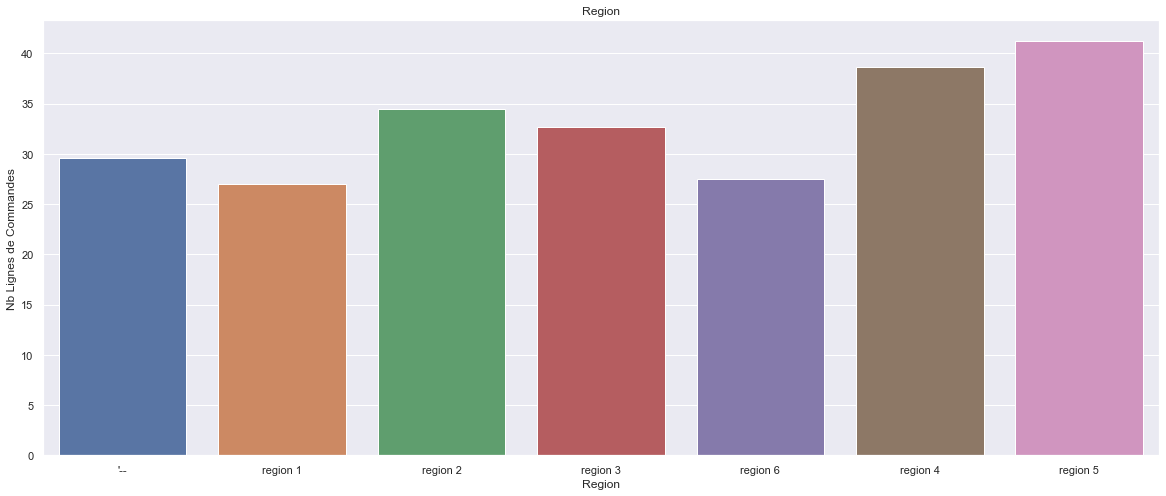

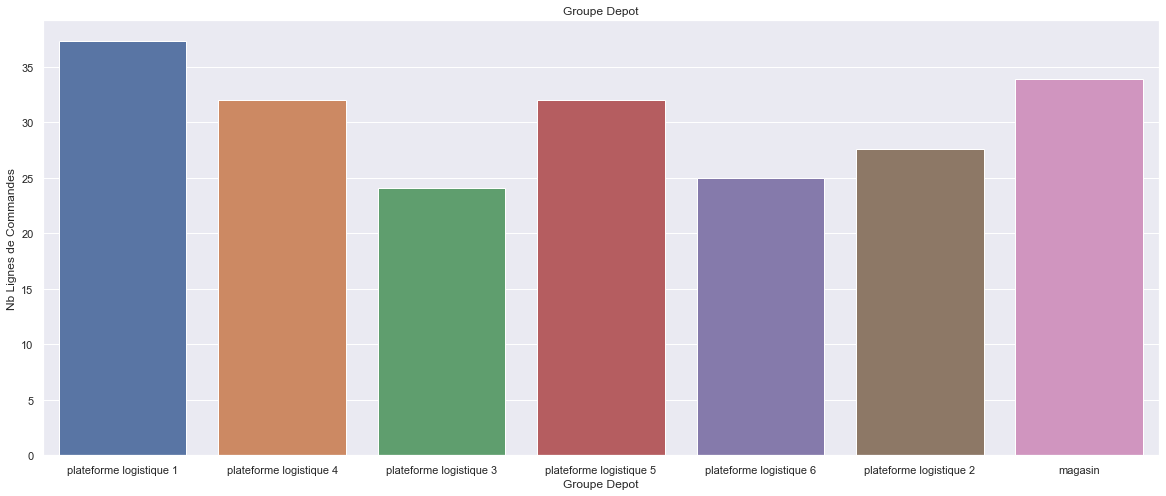

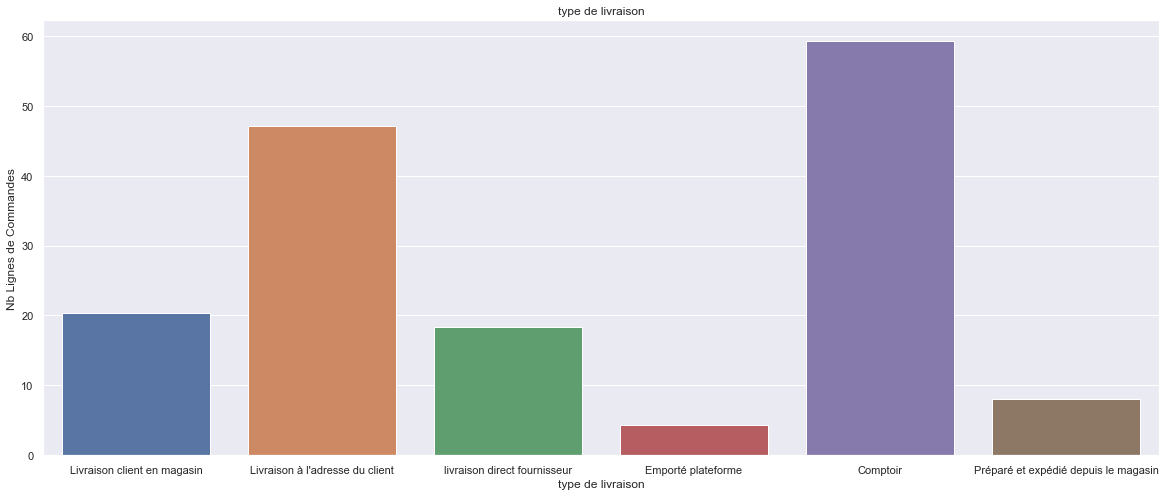

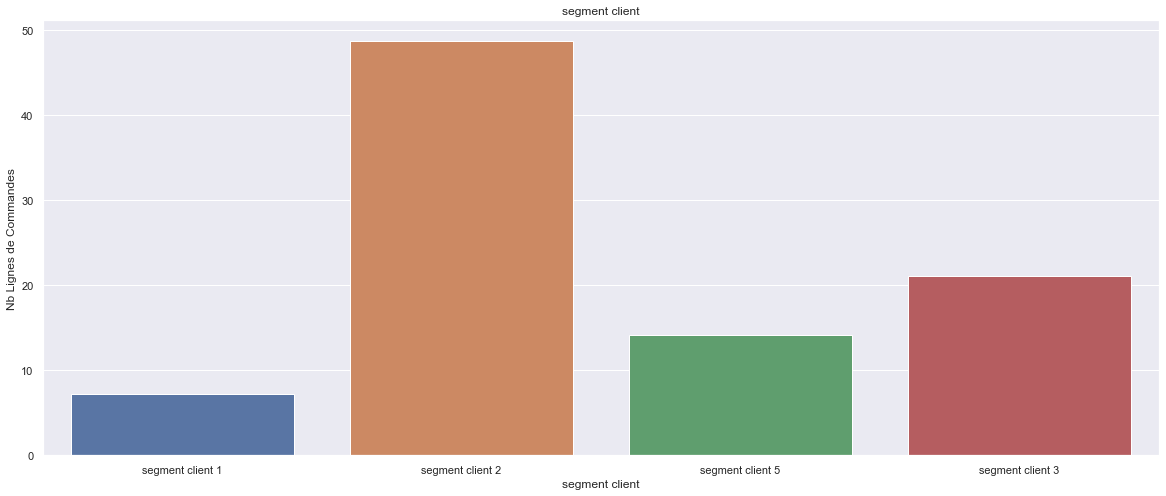

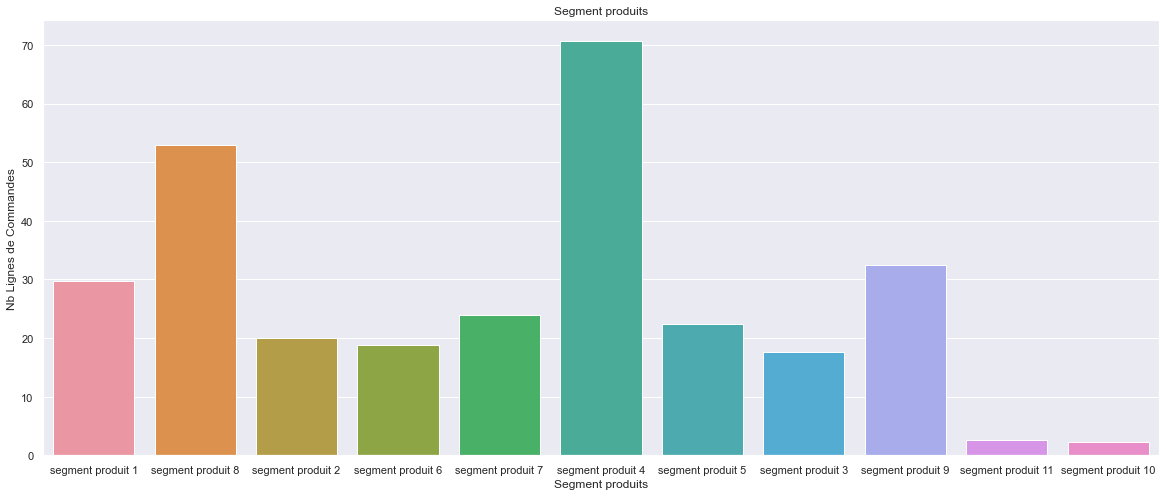

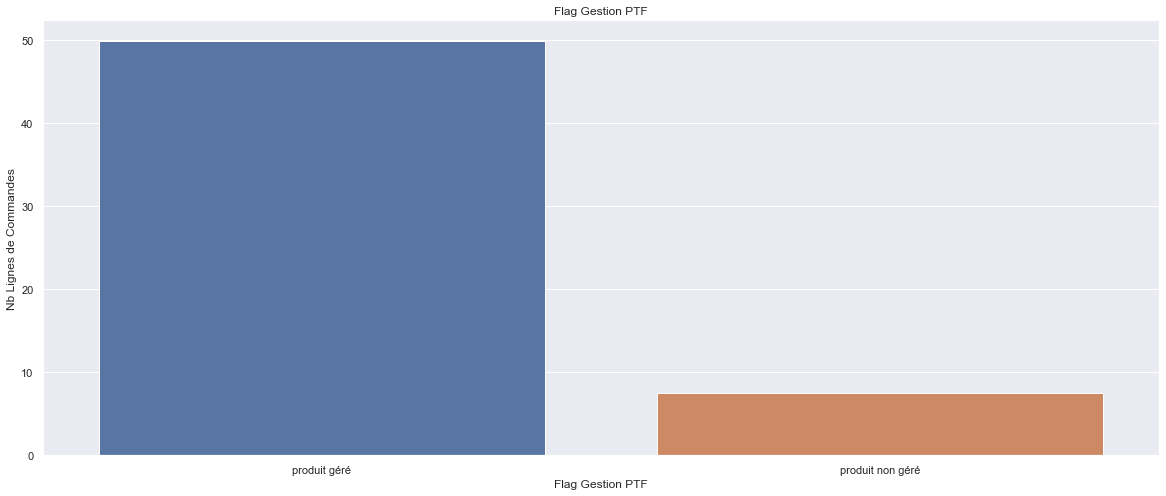

In [12]:
for i in categorical_columns :
    sns.set(style="darkgrid")  
    sns.set(rc = {'figure.figsize':(20,8)})#style the plot background to become a grid
    sns.barplot(x= i,y='Nb Lignes de Commandes', data =data,ci = None).set_title(i)
    plt.show()

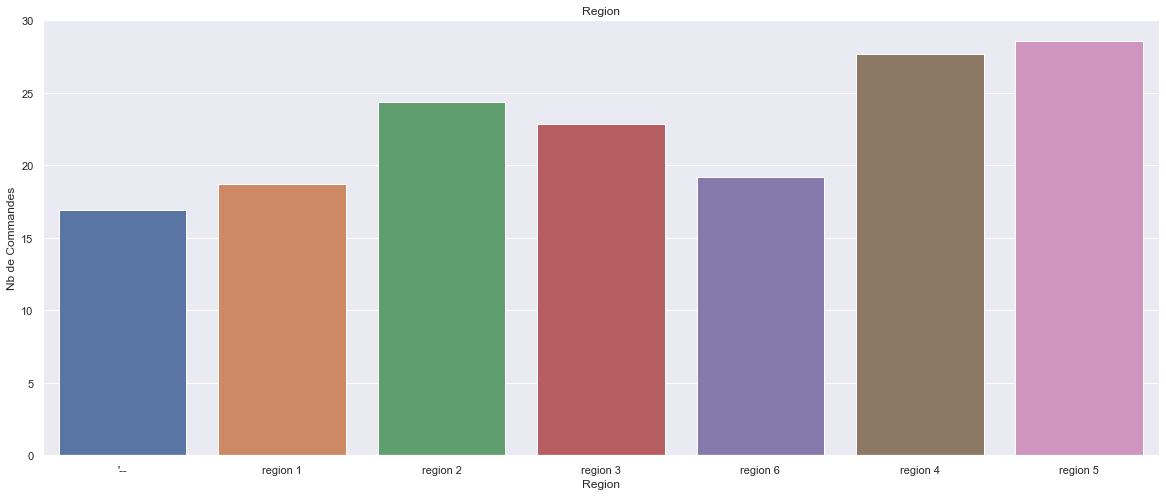

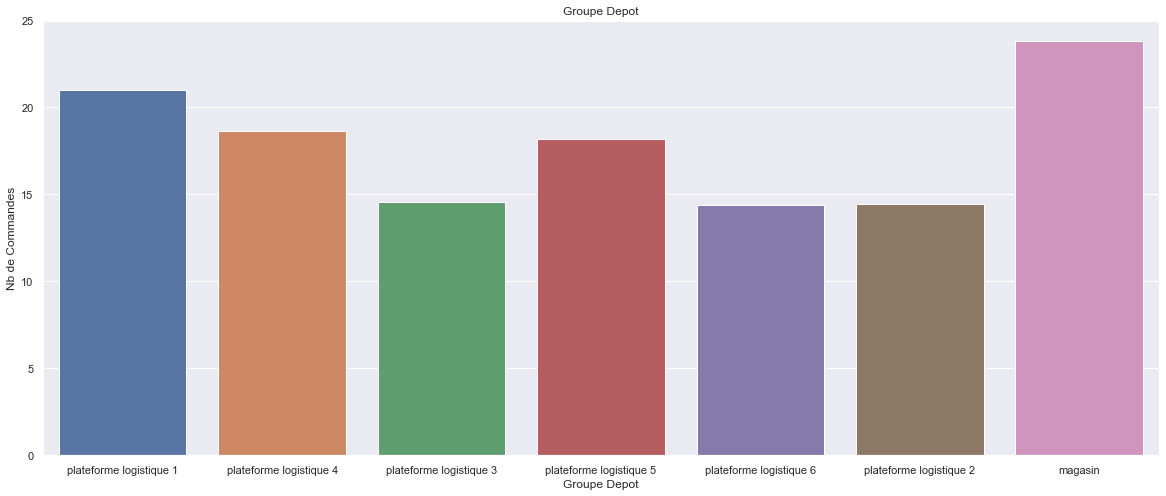

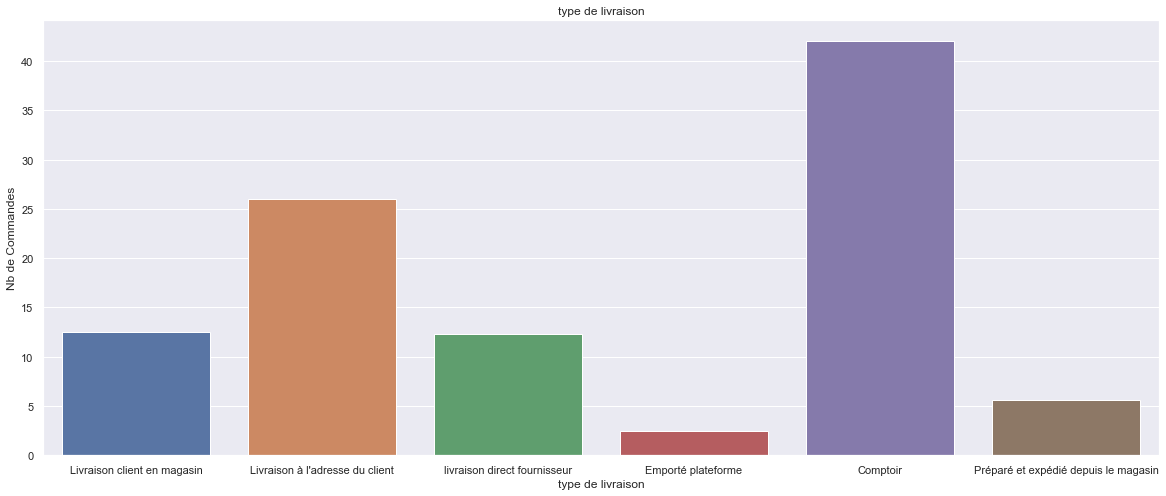

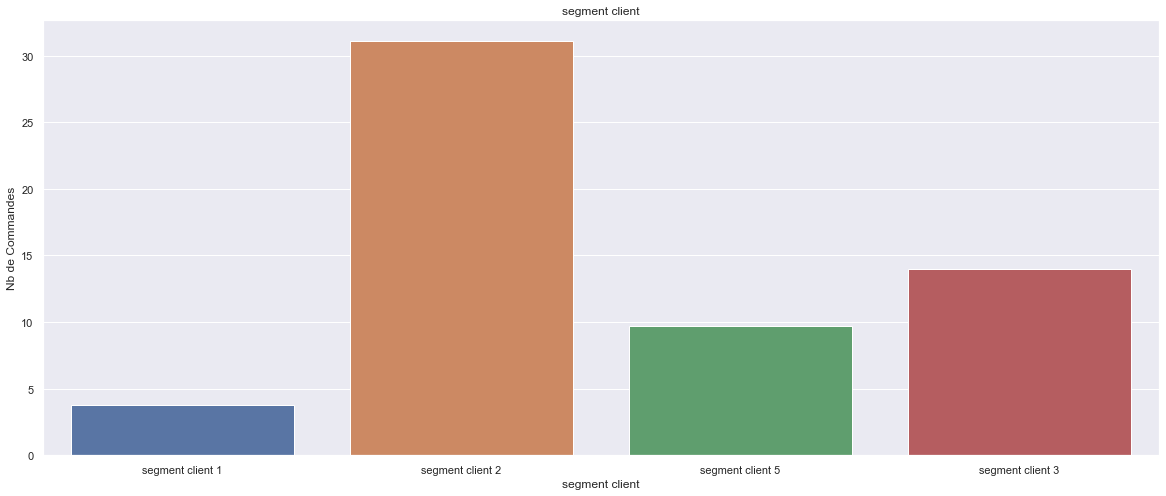

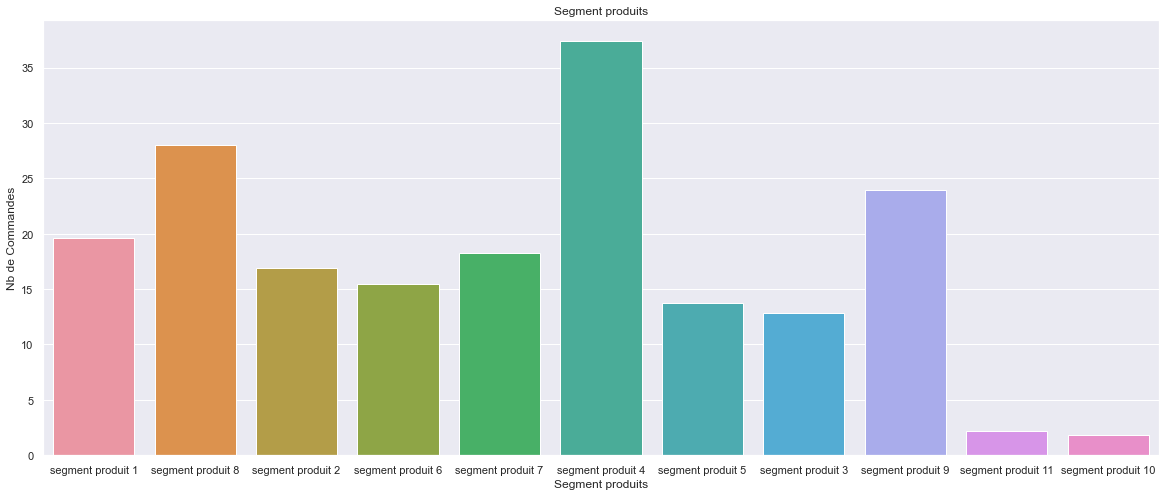

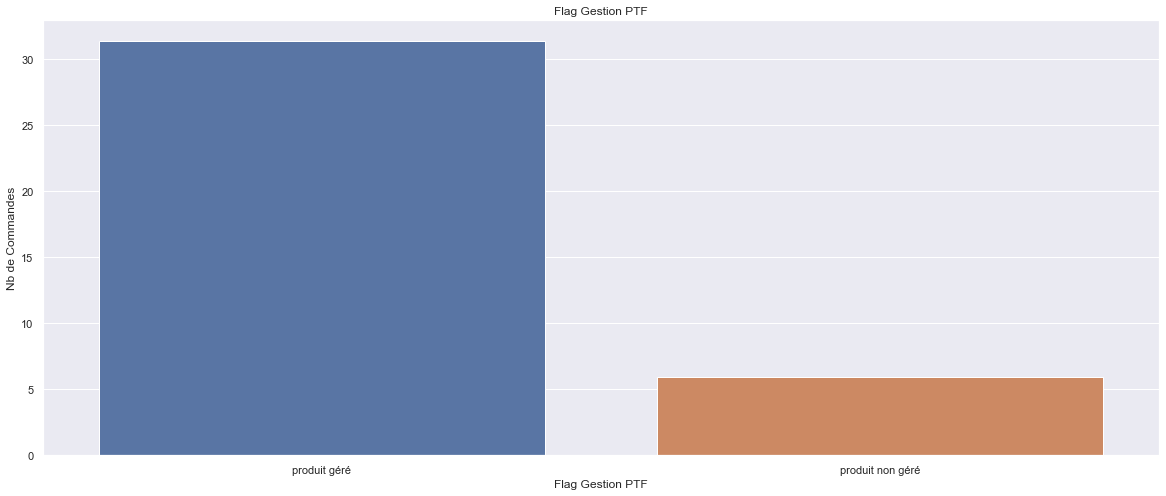

In [13]:
for i in categorical_columns :
    sns.set(style="darkgrid")  
    sns.set(rc = {'figure.figsize':(20,8)})#style the plot background to become a grid
    sns.barplot(x= i,y='Nb de Commandes', data =data,ci = None).set_title(i)
    plt.show()

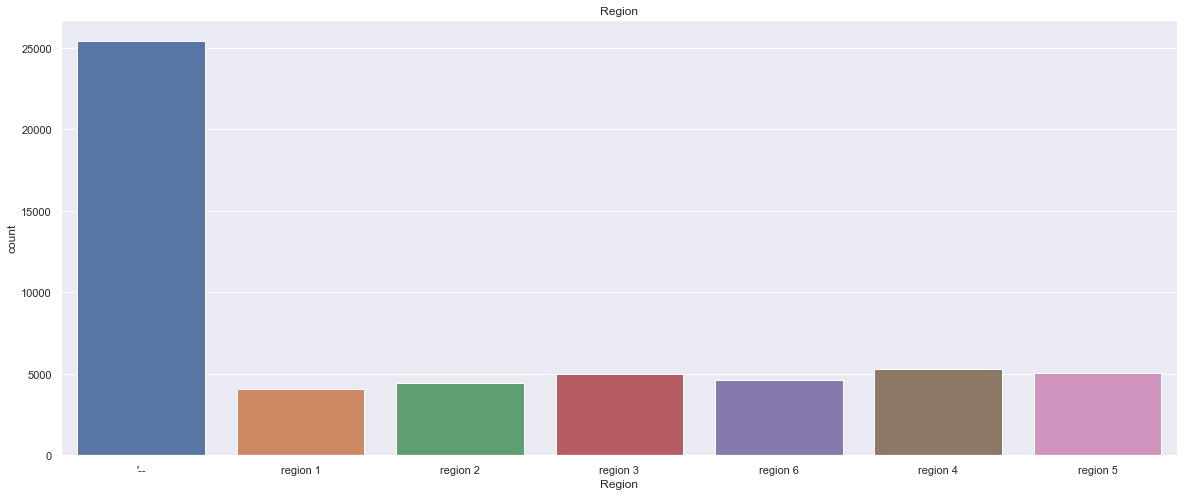

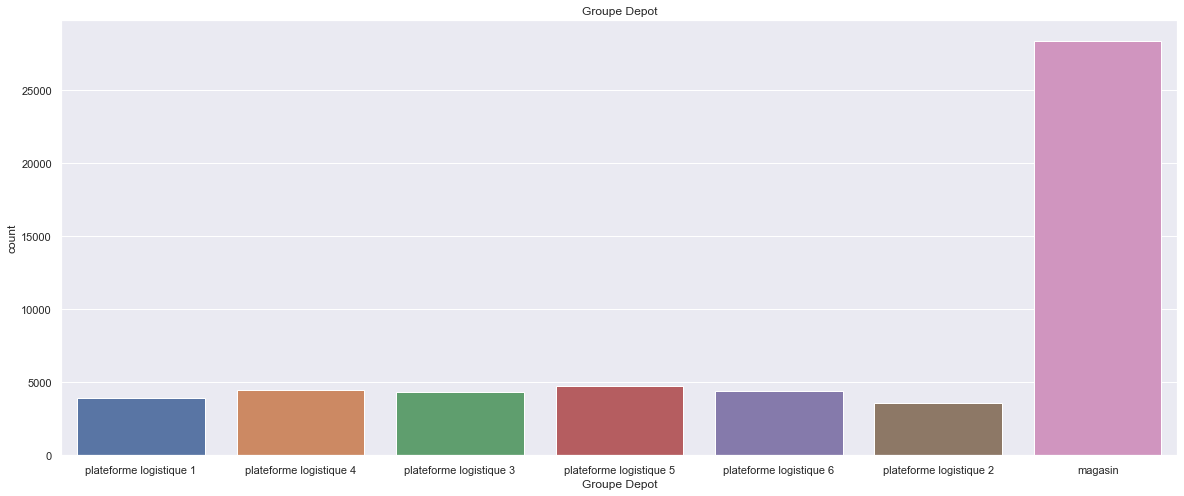

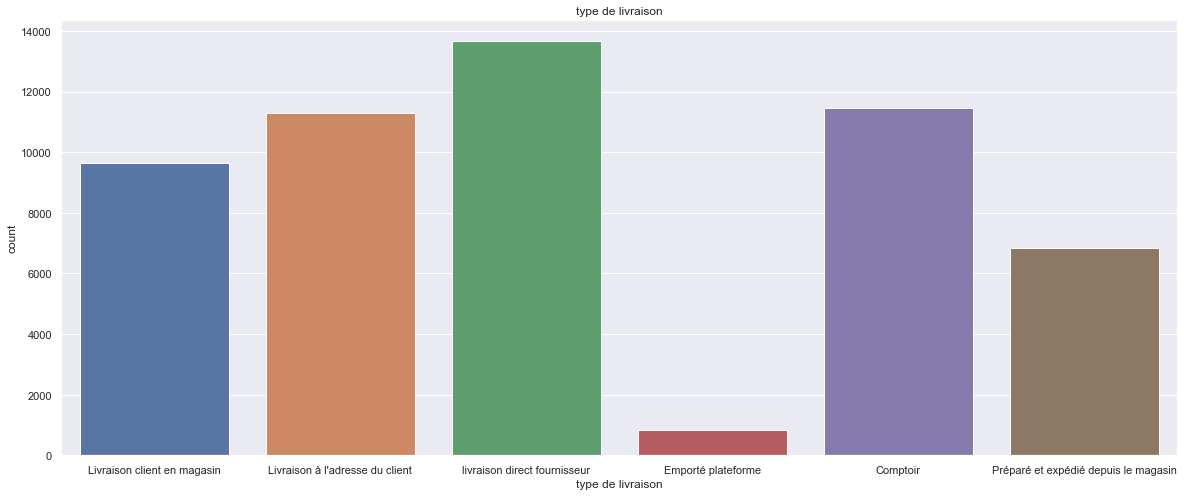

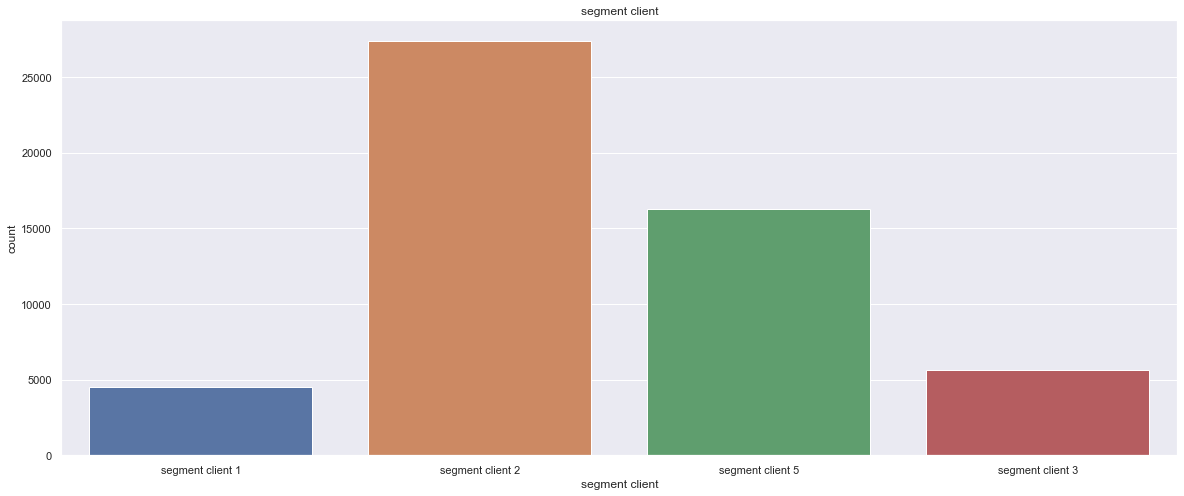

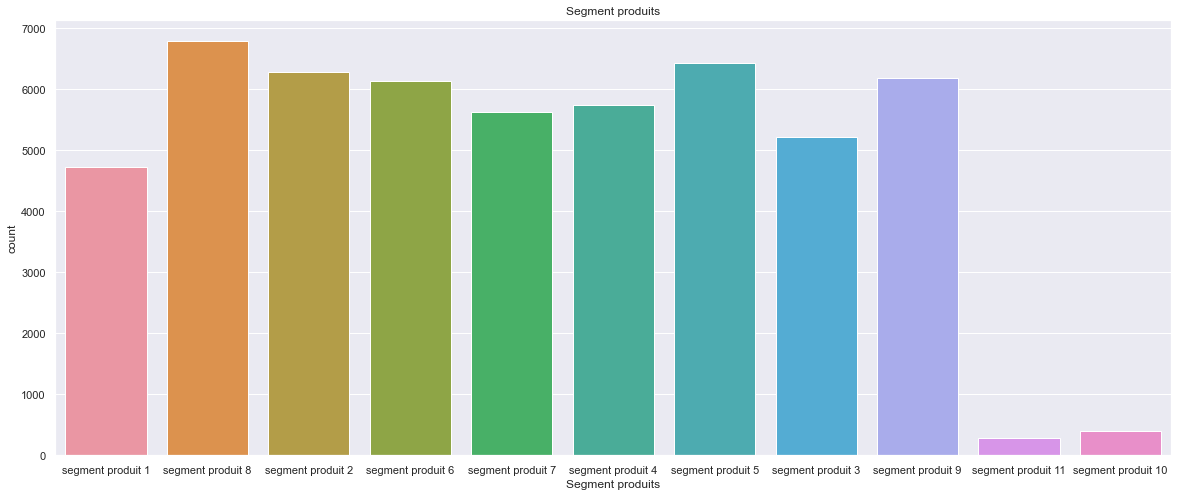

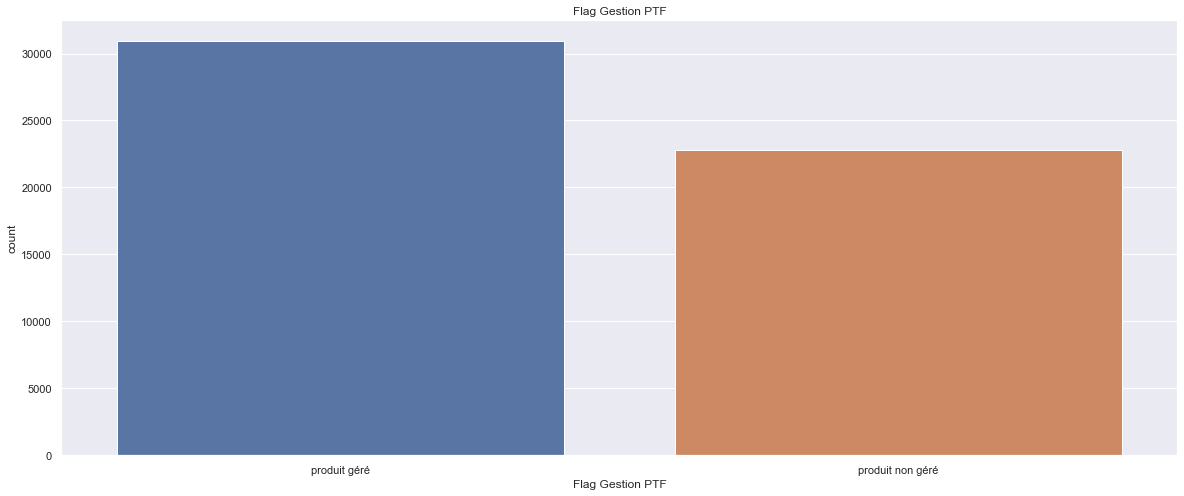

In [14]:
for i in categorical_columns :
    sns.set(style="darkgrid")  
    sns.set(rc = {'figure.figsize':(20,8)})
    genderCount  = sns.countplot(x= i, data =data).set_title(i)
    plt.show()

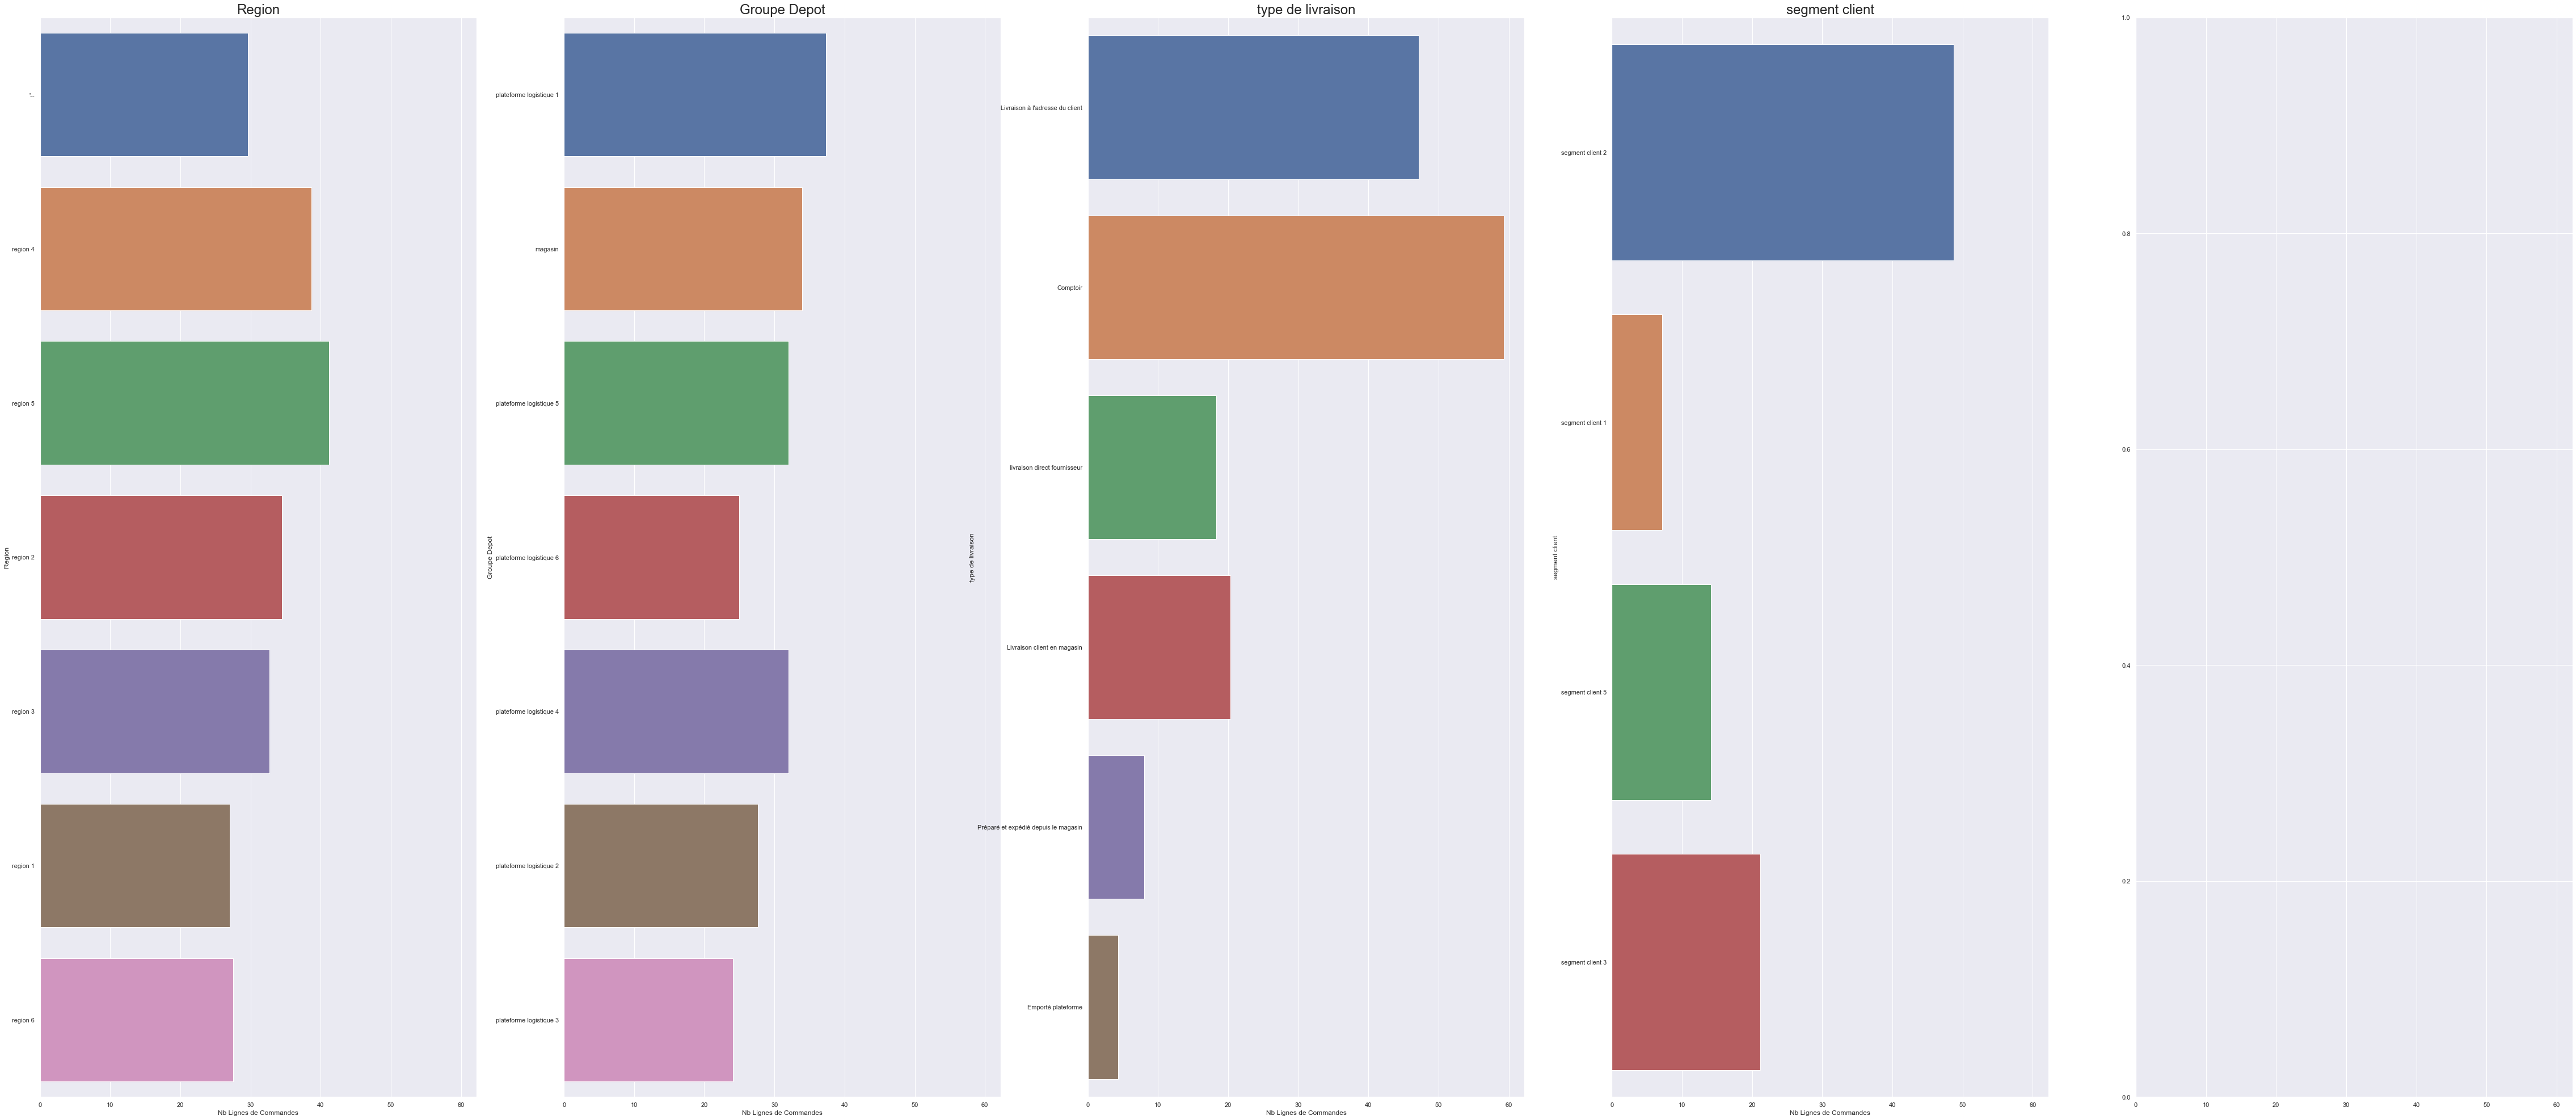

In [15]:
f, axes = plt.subplots(1,5, sharex=True, figsize=(80,35))
j=0
sns.set(font_scale = 2)

for i in categorical_columns[:-2] :
    barplot_pd = data.sort_values('Nb Lignes de Commandes', ascending=False)
    sns.barplot(y= i,x='Nb Lignes de Commandes', data =barplot_pd,ci = None, ax=axes[j],dodge=True).set_title(categorical_columns[j])
    j+=1

<AxesSubplot:xlabel='segment client', ylabel='Nb de Commandes'>

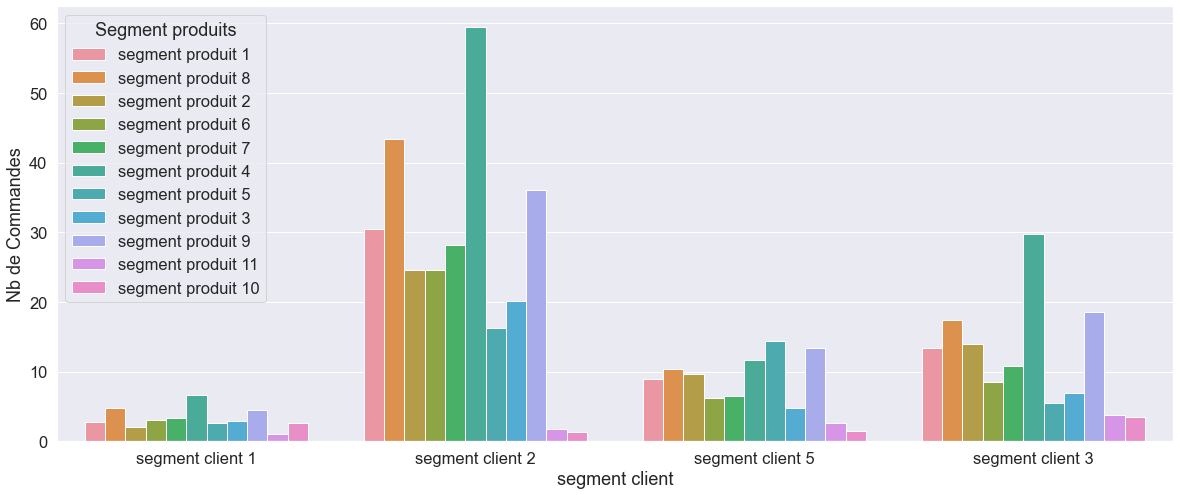

In [16]:
sns.set(font_scale = 1.5)
sns.barplot(x="segment client", y="Nb de Commandes", hue="Segment produits", data=data,ci = None)

<AxesSubplot:xlabel='Region', ylabel='Nb de Commandes'>

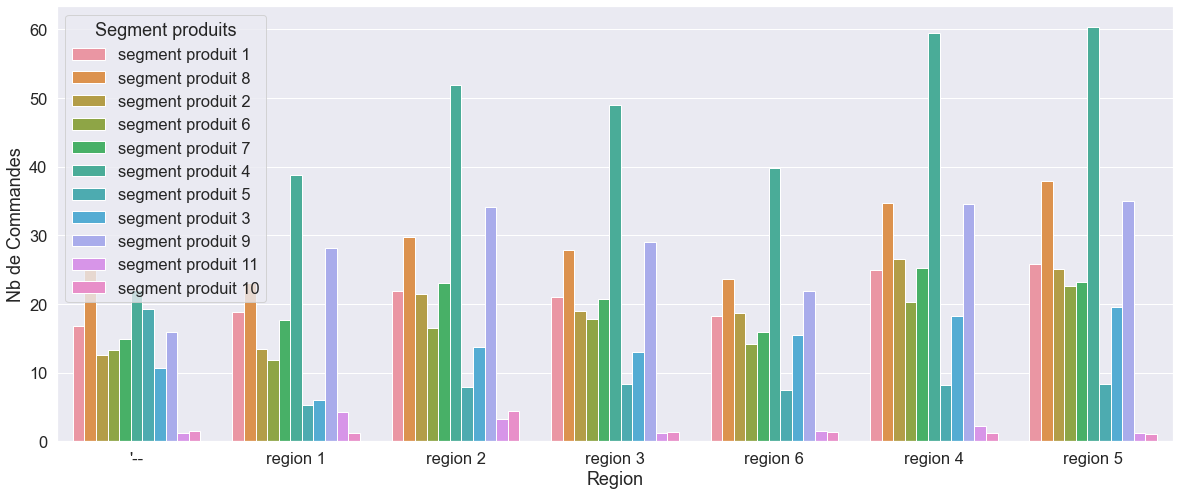

In [17]:
sns.barplot(x="Region", y="Nb de Commandes", hue="Segment produits", data=data,ci = None)

<AxesSubplot:xlabel='Region', ylabel='Nb de Commandes'>

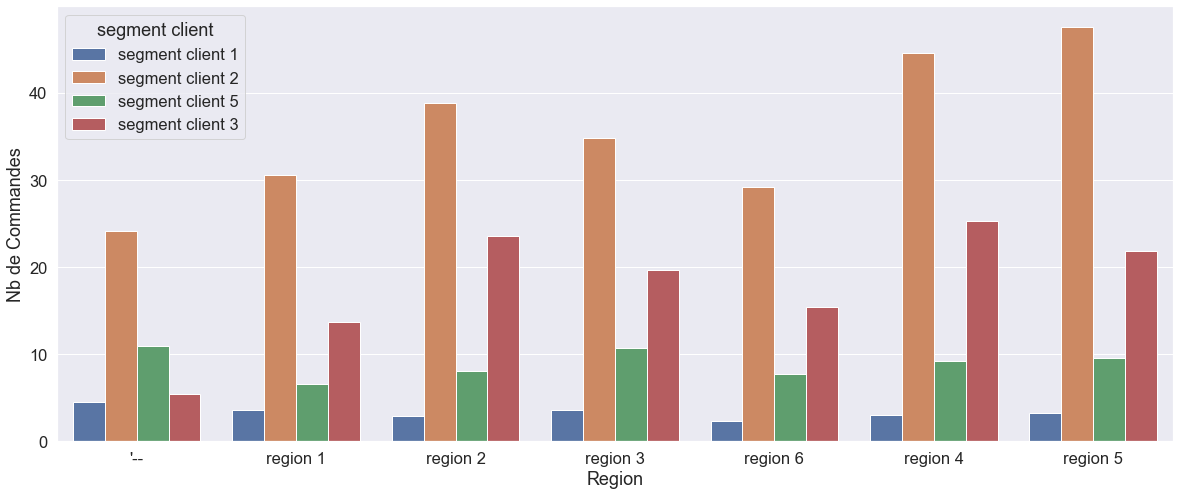

In [18]:
sns.barplot(x="Region", y="Nb de Commandes", hue="segment client", data=data,ci = None)

<AxesSubplot:xlabel='type de livraison', ylabel='Nb de Commandes'>

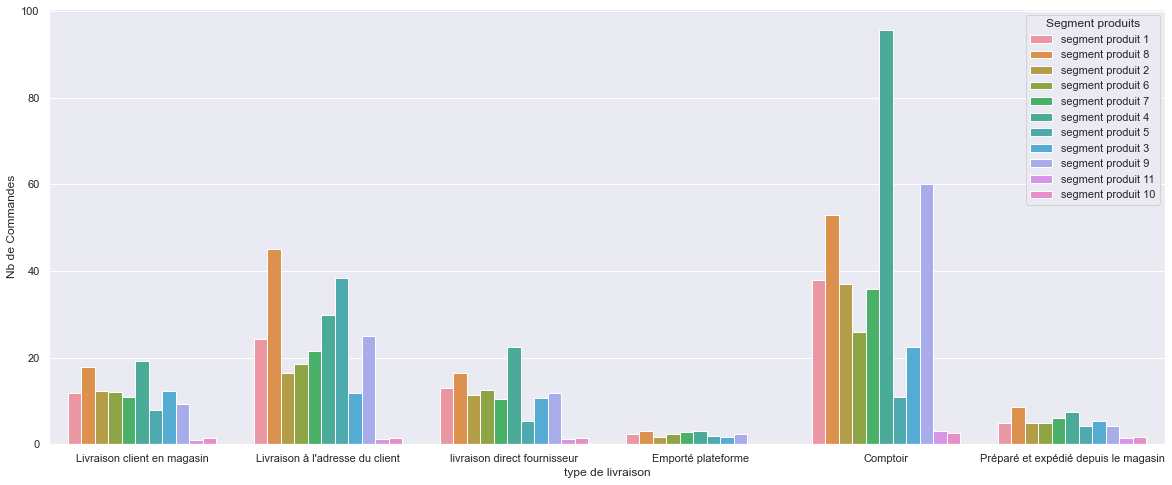

In [19]:
sns.set(font_scale = 1)
sns.barplot(x="type de livraison", y="Nb de Commandes", hue="Segment produits", data=data,ci = None)

<AxesSubplot:xlabel='Groupe Depot', ylabel='Nb de Commandes'>

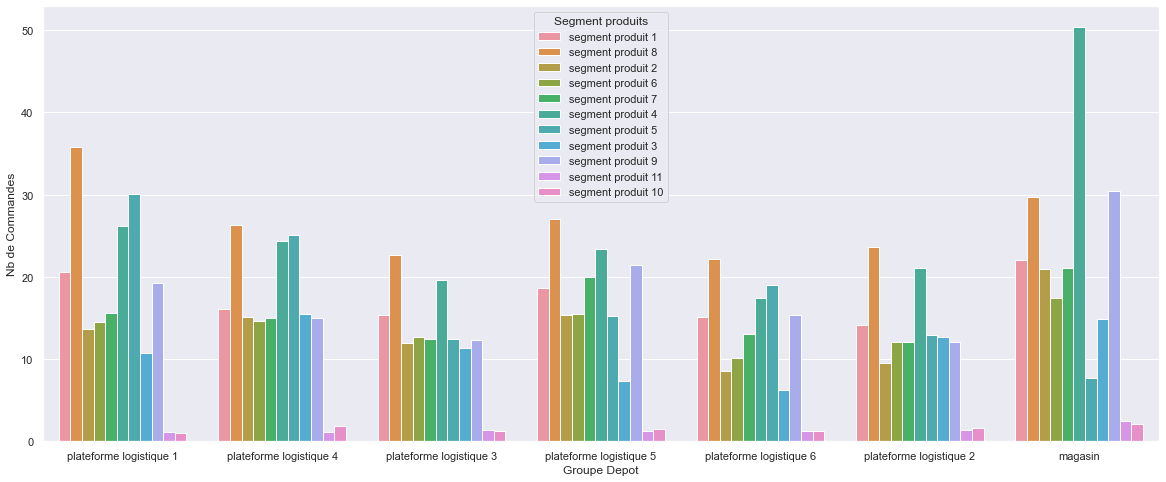

In [20]:
sns.set(font_scale = 1)
sns.barplot(x="Groupe Depot", y="Nb de Commandes", hue="Segment produits", data=data,ci = None)

<AxesSubplot:xlabel='Groupe Depot', ylabel='Nb de Commandes'>

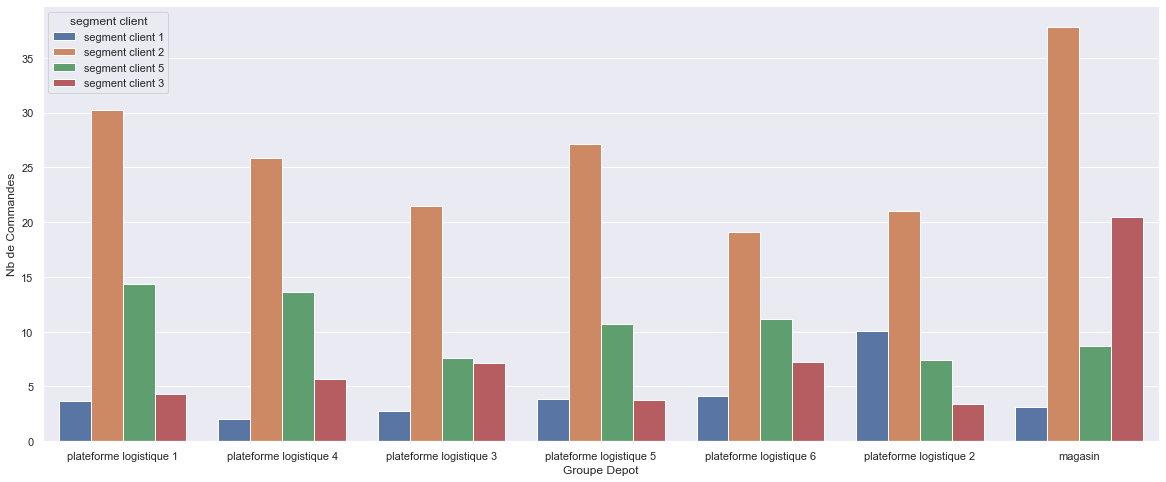

In [21]:
sns.barplot(x="Groupe Depot", y="Nb de Commandes", hue="segment client", data=data,ci = None)

<AxesSubplot:xlabel='Region', ylabel='Nb de Commandes'>

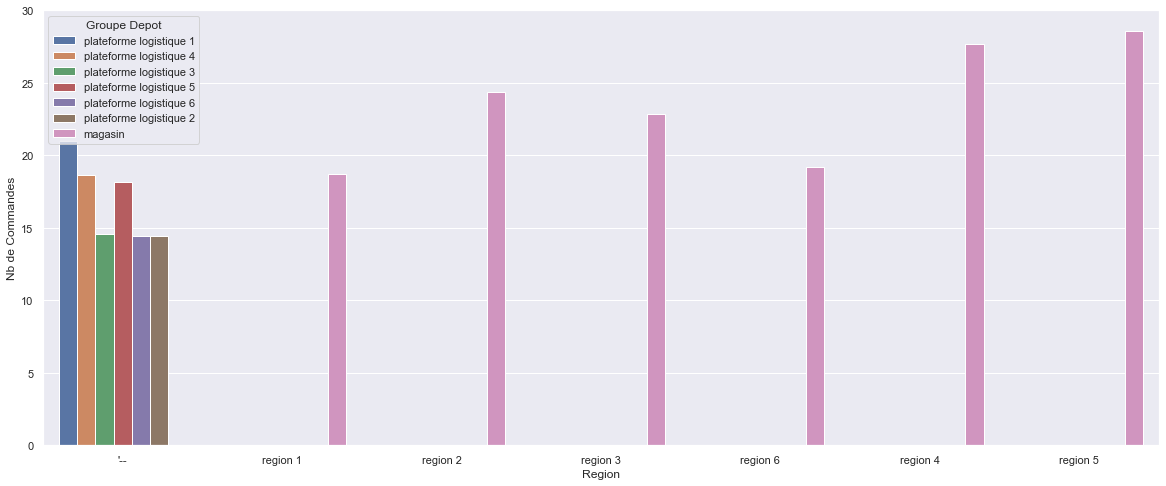

In [22]:
sns.barplot(x="Region", y="Nb de Commandes", hue="Groupe Depot", data=data,ci = None)

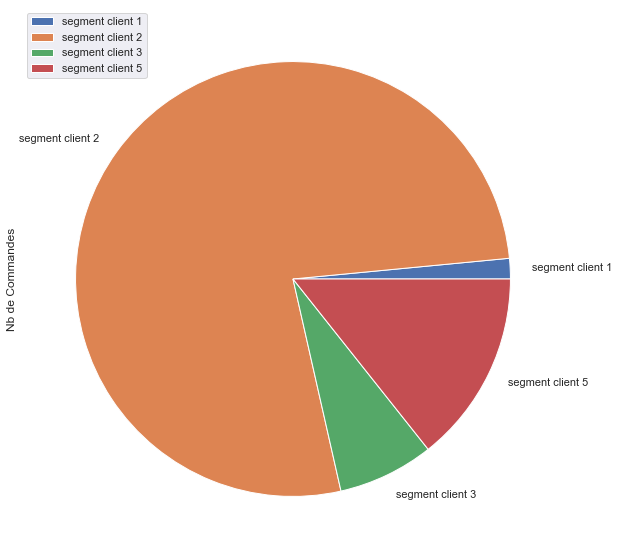

In [23]:
a = pd.DataFrame(data.groupby('segment client').sum()['Nb de Commandes'])


a.plot.pie(y='Nb de Commandes', figsize=(10,10))
plt.legend(loc='upper left')
plt.show()

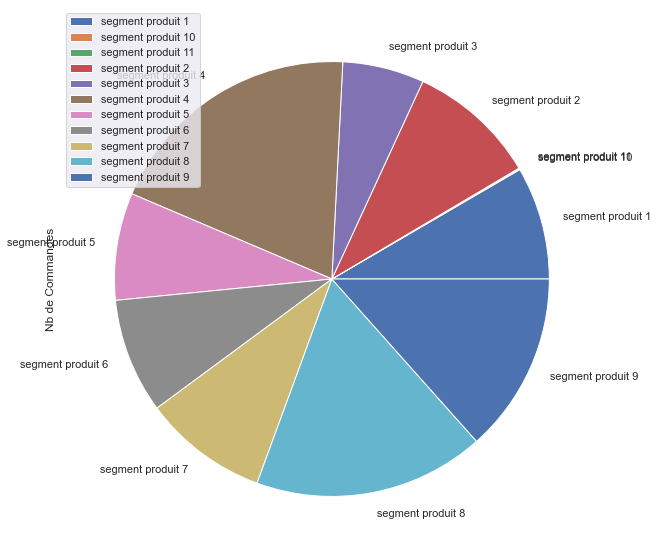

In [24]:
a = pd.DataFrame(data.groupby('Segment produits').sum()['Nb de Commandes'])

sns.set(font_scale = 1)
a.plot.pie(y='Nb de Commandes', figsize=(10,10))
plt.legend(loc='upper left')
plt.show()

In [25]:
data['date'] =  pd.to_datetime(data['date'])
data['Day'] = data['date'].dt.day_name()
data.head()

Region             Groupe Depot            type de livraison  \
0    '--  plateforme logistique 1  Livraison client en magasin   
1    '--  plateforme logistique 1  Livraison client en magasin   
2    '--  plateforme logistique 1  Livraison client en magasin   
3    '--  plateforme logistique 1  Livraison client en magasin   
4    '--  plateforme logistique 1  Livraison client en magasin   

     segment client   Segment produits  Flag Gestion PTF  Nb de Commandes  \
0  segment client 1  segment produit 1      produit géré                1   
1  segment client 1  segment produit 8      produit géré                1   
2  segment client 1  segment produit 2      produit géré                1   
3  segment client 1  segment produit 6      produit géré                1   
4  segment client 2  segment produit 1  produit non géré                1   

   Nb Lignes de Commandes       date     Day  
0                       1 2021-05-03  Monday  
1                       1 2021-05-03  Monday  
2                       1 2021-05-03  Monday  
3                       1 2021-05-03  Monday  
4                       1 2021-05-03  Monday

In [26]:
daywise_df = data.groupby('Day').sum()
daywise_df = daywise_df.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) 
daywise_df=daywise_df[['Nb de Commandes']]
daywise_df['Nb de Commandes'] = daywise_df['Nb de Commandes'].fillna(0)
daywise_df.head(10)

Nb de Commandes
Day                       
Monday            247872.0
Tuesday           251361.0
Wednesday         234431.0
Thursday          176021.0
Friday            194549.0
Saturday             525.0
Sunday                 0.0

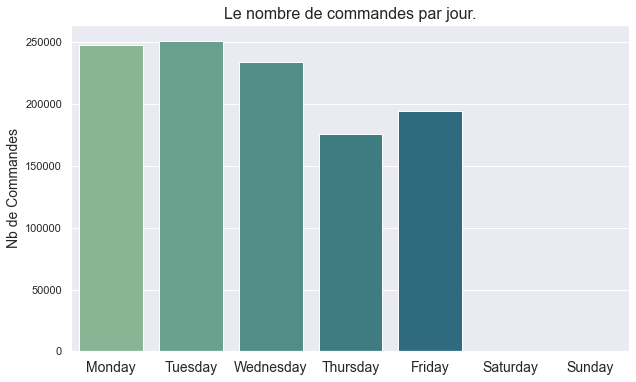

In [27]:
fig, ax1 = plt.subplots(figsize=(10, 6))

daywise_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax1 = sns.barplot(x=daywise_day, y=daywise_df['Nb de Commandes'], data = daywise_df, palette='crest')
ax1.set_title('Le nombre de commandes par jour.', size=16)

ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_ylabel('Nb de Commandes', fontsize=14)
ax1.set_xticklabels(daywise_day, fontsize=14)
plt.show()


<AxesSubplot:xlabel='Region', ylabel='Nb de Commandes'>

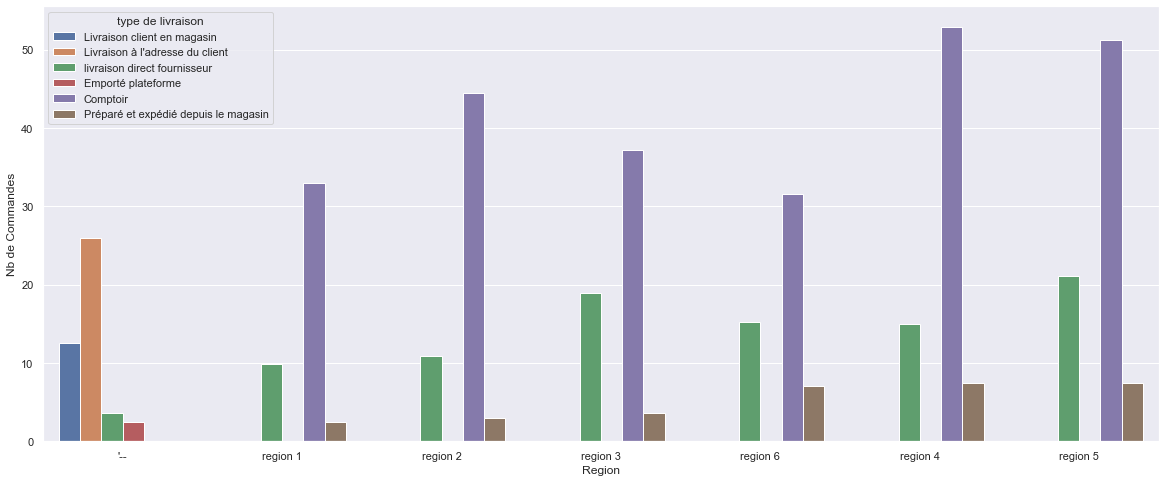

In [28]:
sns.set(font_scale = 1)
sns.barplot(x="Region", y="Nb de Commandes", hue="type de livraison", data=data,ci = None)

Text(0.5, 1.0, 'Nombre de commandes')

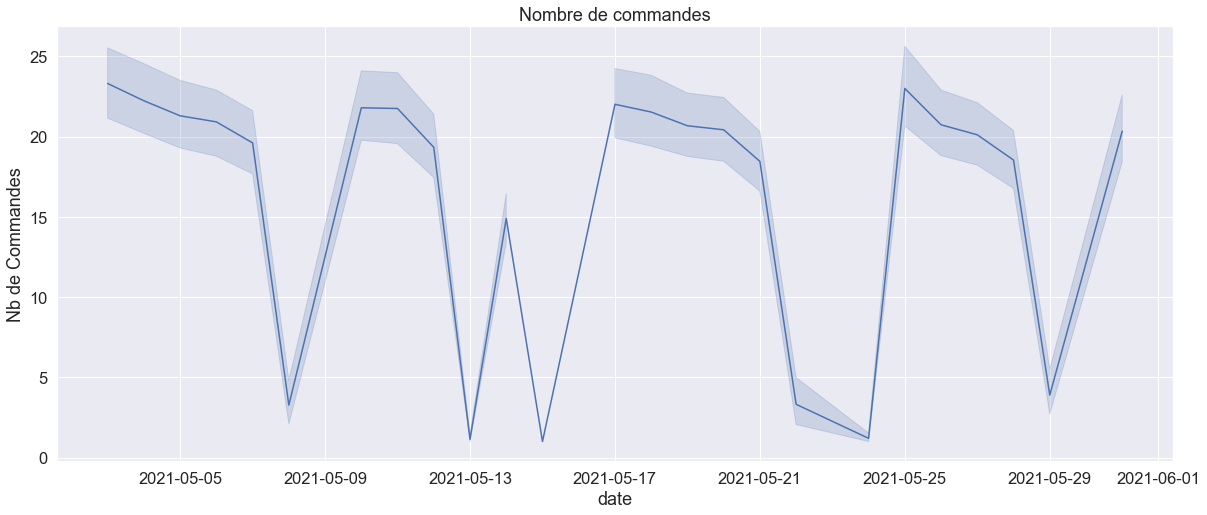

In [29]:
sns.set(font_scale = 1.5)
sns.lineplot(x="date",  y = 'Nb de Commandes',data =data).set_title("Nombre de commandes")

Text(0.5, 1.0, 'Nombre de lignes de commandes')

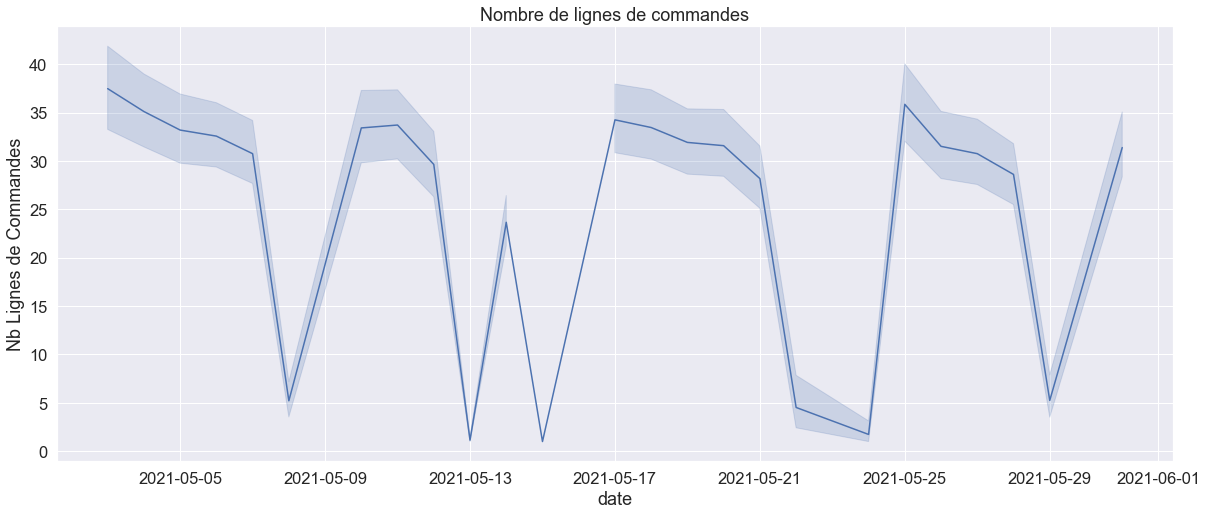

In [30]:
sns.lineplot(x="date",  y = 'Nb Lignes de Commandes',data =data).set_title("Nombre de lignes de commandes")

In [31]:
ts= data.groupby('date').sum()['Nb Lignes de Commandes'] 
TS=pd.DataFrame(ts)
TS

Nb Lignes de Commandes
date                              
2021-05-03                  106314
2021-05-04                   98759
2021-05-05                   95097
2021-05-06                   92458
2021-05-07                   84537
2021-05-08                     172
2021-05-10                   93892
2021-05-11                   95140
2021-05-12                   82016
2021-05-13                       8
2021-05-14                   61089
2021-05-15                       1
2021-05-17                   95965
2021-05-18                   95816
2021-05-19                   90961
2021-05-20                   89367
2021-05-21                   78529
2021-05-22                     312
2021-05-24                      26
2021-05-25                  102541
2021-05-26                   92700
2021-05-27                   89953
2021-05-28                   78296
2021-05-29                     252
2021-05-31                   90732

In [32]:
TS=TS.reset_index('date')
TS

    

date  Nb Lignes de Commandes
0  2021-05-03                  106314
1  2021-05-04                   98759
2  2021-05-05                   95097
3  2021-05-06                   92458
4  2021-05-07                   84537
5  2021-05-08                     172
6  2021-05-10                   93892
7  2021-05-11                   95140
8  2021-05-12                   82016
9  2021-05-13                       8
10 2021-05-14                   61089
11 2021-05-15                       1
12 2021-05-17                   95965
13 2021-05-18                   95816
14 2021-05-19                   90961
15 2021-05-20                   89367
16 2021-05-21                   78529
17 2021-05-22                     312
18 2021-05-24                      26
19 2021-05-25                  102541
20 2021-05-26                   92700
21 2021-05-27                   89953
22 2021-05-28                   78296
23 2021-05-29                     252
24 2021-05-31                   90732

In [33]:
L=[]
for i in range(3,32):
    b='2021-05-'+str(i)
    L.append(b)
df=pd.DataFrame(L)  


In [34]:
df=df.rename(columns={0:'date'})
df['date'] = pd.to_datetime(df['date'])

In [35]:
dt=df.merge(TS,how='outer', on='date')
print('Le nombre de variable manquante est :',dt.isnull().sum())
print('La taille de la serie temporelle :',dt.shape)

Le nombre de variable manquante est : date                      0
Nb Lignes de Commandes    4
dtype: int64
La taille de la serie temporelle : (29, 2)


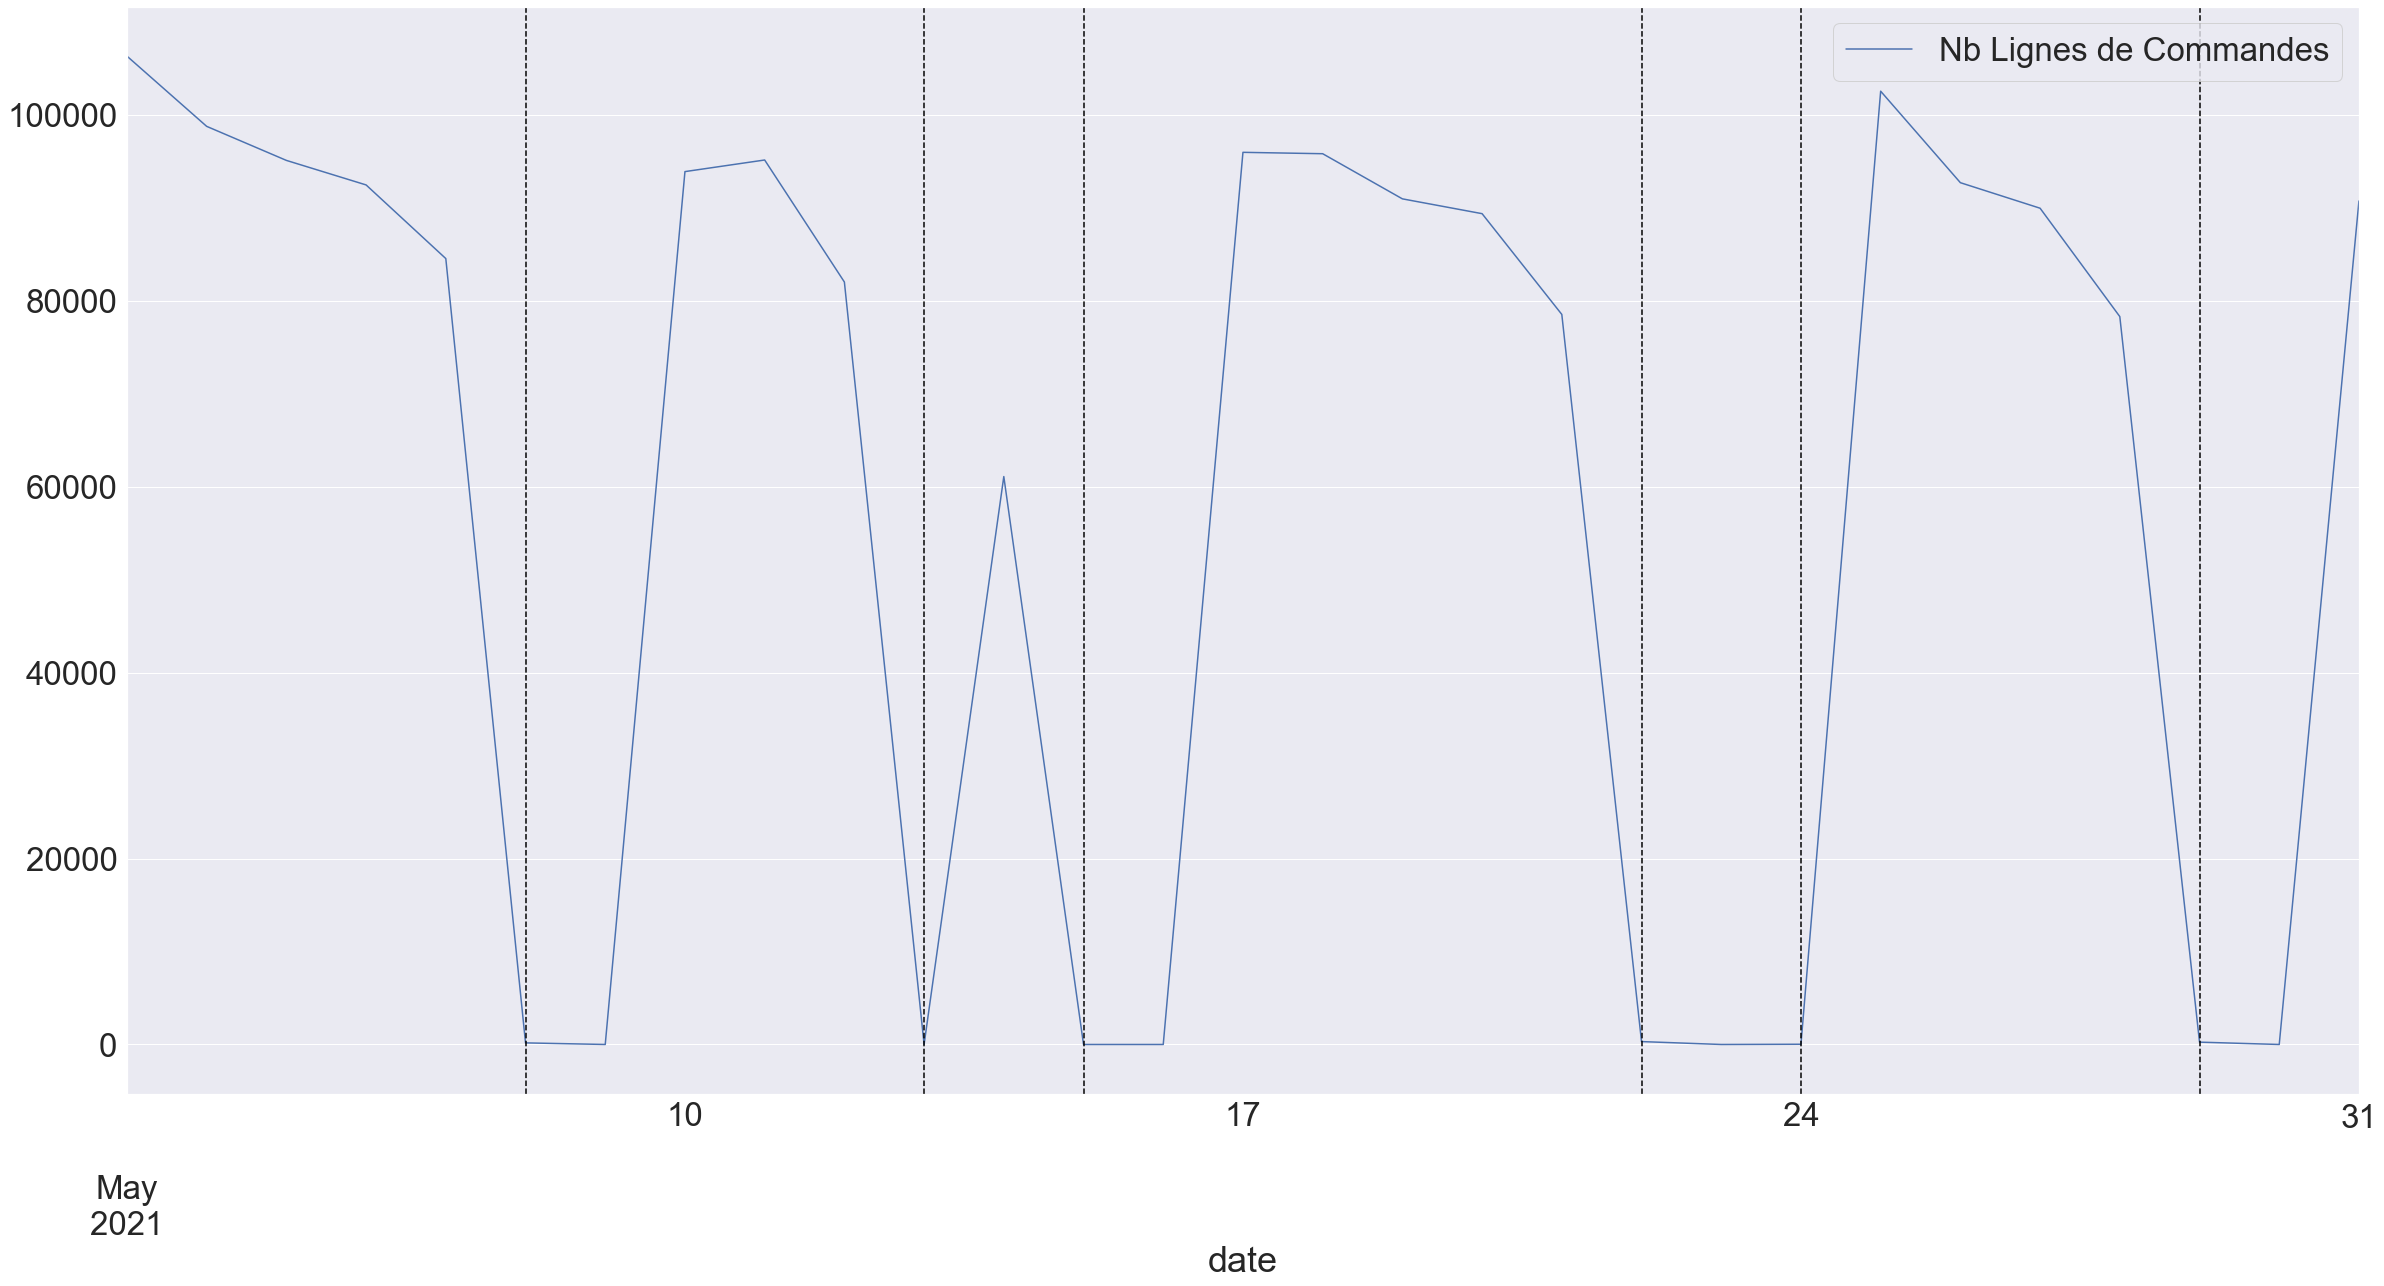

In [37]:
dt['Nb Lignes de Commandes'] = dt['Nb Lignes de Commandes'].fillna(0)
sns.set(font_scale = 3)
ax = dt.plot(x='date', y='Nb Lignes de Commandes', figsize=(40,20))
xcoords = ['2021-05-08', '2021-05-13','2021-05-15', '2021-05-22', '2021-05-24','2021-05-29']
#### les chutes peuvent etre expliquer par :
#### 8 mai Fête nationale du 8 mai 1945
#### 13 mai ascension 
### 23,24 mai Pentecôte
for xc in xcoords:
    plt.axvline(x=xc, color='black', linestyle='--')

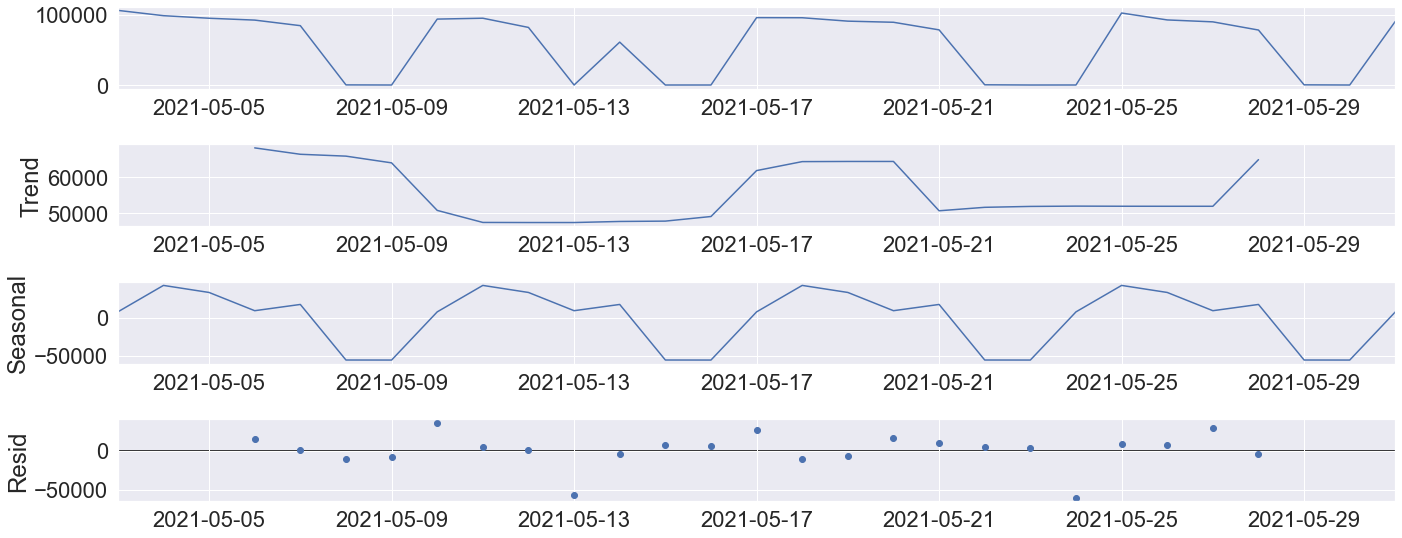

In [38]:
sns.set(font_scale = 2)
from statsmodels.tsa.seasonal import seasonal_decompose

dt.set_index('date', inplace=True)

analysis = dt[['Nb Lignes de Commandes']].copy()


decompose_result_mult = seasonal_decompose(analysis, model="additive")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();

In [39]:
dt=dt.reset_index('date')

In [40]:
dt = dt.rename(columns={"date":'ds'}) 
dt = dt.rename(columns={"Nb Lignes de Commandes":'y'}) 
dt

ds         y
0  2021-05-03  106314.0
1  2021-05-04   98759.0
2  2021-05-05   95097.0
3  2021-05-06   92458.0
4  2021-05-07   84537.0
5  2021-05-08     172.0
6  2021-05-09       0.0
7  2021-05-10   93892.0
8  2021-05-11   95140.0
9  2021-05-12   82016.0
10 2021-05-13       8.0
11 2021-05-14   61089.0
12 2021-05-15       1.0
13 2021-05-16       0.0
14 2021-05-17   95965.0
15 2021-05-18   95816.0
16 2021-05-19   90961.0
17 2021-05-20   89367.0
18 2021-05-21   78529.0
19 2021-05-22     312.0
20 2021-05-23       0.0
21 2021-05-24      26.0
22 2021-05-25  102541.0
23 2021-05-26   92700.0
24 2021-05-27   89953.0
25 2021-05-28   78296.0
26 2021-05-29     252.0
27 2021-05-30       0.0
28 2021-05-31   90732.0

In [41]:
m = Prophet()
m.fit(dt)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 22.


In [42]:
future = m.make_future_dataframe(periods=3)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds          yhat    yhat_lower     yhat_upper
27 2021-05-30  -3109.654502 -33635.499116   24369.973760
28 2021-05-31  73419.621403  44330.456311  100458.560803
29 2021-06-01  93199.094480  66690.638187  119233.270220
30 2021-06-02  85306.148324  56601.750280  110016.303665
31 2021-06-03  63024.408187  35389.630609   92239.301034

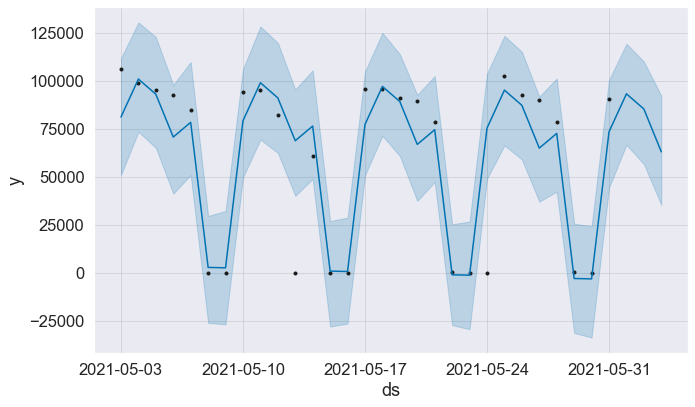

In [43]:
sns.set(font_scale = 1.5)
fig1 = m.plot(forecast)

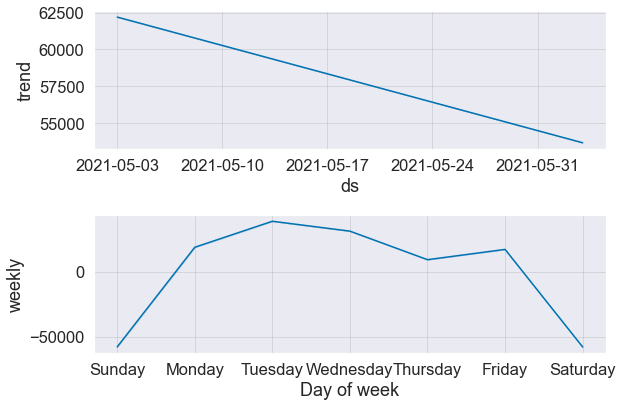

In [44]:
fig2 = m.plot_components(forecast)

In [45]:
plot_plotly(m, forecast)

In [46]:
plot_components_plotly(m, forecast)